# Tests of GD Convergence Depth

This document is a test of the hidden-layer depth threshold for different monomial activation functions. Specifically, SGL and Manelli found that 
$$ k \geq 2d $$
is sufficient for ensuring GD converges to 0 and has no spurious local minima. We seek to find the relationship between $k$ and $d$ for other monomials

Here we will use a single-layer monomial-activation neural network. In some tests, all the output weights are set to 1 to better match Manelli, but not always.

In [ ]:
# inport nn files
from experiment import *
from monomial_neural_network import *
import matplotlib.pyplot as plt
import numpy as np

In [12]:
## Create a function that will make data and train a neural network using a given number of data points and epochs
def test_training(n, k, M):
    # n is the number of data points
    # k is the hidden layer depth
    # M is the number of epochs

    d = 14 # just fix the dimension of the data for now
    teacher_k = [k] # single layer
    teacher_model = generate_teacher_model_noOutWeight(d, teacher_k) # use unit weights for these calculations
    # teacher_model = generate_teacher_model(d, teacher_k)
    print(teacher_model)

    # generate data
    data = generate_data(n, d, teacher_model)

    # create student
    student_k = [k] # student model hidden layer sizes - 2 layers with increasing number of neurons
    student_model = generate_student_model_noOutWeight(d, student_k)
    # student_model = generate_student_model(d, k=student_k)

    # train the student
    student_model, losses = train(
        model = student_model, 
        x_train = data[0], 
        y_train= data[1], 
        num_epochs = M, 
        lr = 2e-3,
        print_stuff=False
        )
    
    # print(student_model.layers[0].weight)
    # print(student_model.layers[2].weight)
    # print(teacher_model.layers[0].weight)
    # print(teacher_model.layers[2].weight)
    student_w = student_model.layers[0].weight.detach().numpy()
    teacher_w = teacher_model.layers[0].weight.detach().numpy()
    # return the final loss
    return losses, student_w, teacher_w

MonomialNeuralNetwork_noOutputWeight(
  (layers): Sequential(
    (0): Linear(in_features=14, out_features=4, bias=False)
    (1): Monomial()
    (2): Linear(in_features=4, out_features=1, bias=False)
  )
)
starting training

Training Complete
2.2334020743919325e-10
[[ 7.7486038e-07  8.9406967e-08 -2.9802322e-07 -4.8428774e-07
  -7.0035458e-07  1.0579824e-06 -1.5879050e-07  8.9406967e-07
   6.8638474e-07 -1.7881393e-07 -2.9057264e-07 -4.7683716e-07
   1.9371510e-07  3.6507845e-07]
 [ 8.9406967e-08  1.4305115e-06  5.9604645e-07 -1.1920929e-07
   9.5367432e-07 -2.3096800e-07 -1.1324883e-06  1.2964010e-06
   7.5995922e-07 -1.0281801e-06 -1.1622906e-06 -3.8743019e-07
  -1.0728836e-06 -7.7486038e-07]
 [-2.9802322e-07  5.9604645e-07  5.9604645e-08 -3.4272671e-07
   8.1956387e-07  7.4505806e-09 -1.1622906e-06  9.3877316e-07
   1.0430813e-07 -1.6763806e-07 -1.0728836e-06  2.9802322e-08
  -8.0466270e-07 -2.7939677e-07]
 [-4.8428774e-07 -1.1920929e-07 -3.4272671e-07 -1.6689301e-06
  -4.0233135e-

Text(0.5, 0, 'Iteration')

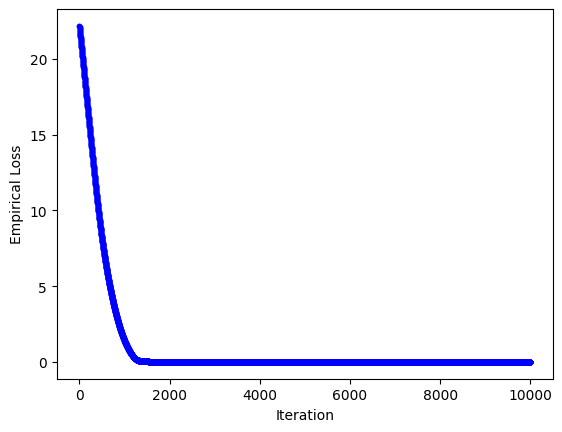

In [ ]:
# test out the function
l, stud_w, teach_w = test_training(n=1000, k=4, M=10000)
print(l[-1])
print(stud_w.T@stud_w - teach_w.T@teach_w)
stud_eig, stud_eig_vec = np.linalg.eig(stud_w.T@stud_w)
teach_eig, teach_eig_vec = np.linalg.eig(teach_w.T@teach_w)
print(stud_eig)
print(teach_eig)
fig = plt.figure()
plt.plot(np.arange(len(l)),l,'b.')
plt.ylabel("Empirical Loss")
plt.xlabel("Iteration")